# <center>Tugas Besar Kecerdasan Artifisial</center>

<b>Topik</b>
Klasifikasi pada Dataset Pima Indians Diabetes menggunakan KNN

<b>Kelompok: </b>

Anggota:
1. Aulia Faradis Ishmah - 1301220006
2. Nailah Aulia Syawie - 1301220234

#### <b>Pendahuluan</b>

<b>MASALAH YANG AKAN DISELESAIKAN</b><br>
Dataset Pima Indians Diabetes berisi data mengenai pasien wanita dari suku Pima Indian yang dirancang untuk memprediksi apakah seorang pasien berisiko mengidap diabetes. Hal ini diukur berdasarkan faktor-faktor seperti kadar glukosa, tekanan darah, BMI, dan lainnya. Dalam tugas ini, akan dibangun model KNN untuk melakukan klasifikasi dan membantu dalam proses diagnosis dini diabetes.

Sumber: National Institute of Diabetes and Digestive and Kidney Disease<br>
URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KA_tubes/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Dataset**

1. Pregnancies: Jumlah kehamilan yang pernah dialami.
2. Glucose: Konsentrasi glukosa plasma dari tes toleransi glukosa oral.
3. BloodPressure: Tekanan darah diastolik dalam mm Hg.
4. BloodPressure: Tekanan darah diastolik dalam mm Hg.
5. SkinThickness: Ketebalan lipatan kulit triceps dalam mm.
6. Insulin: Kadar insulin serum selama 2 jam (mu U/ml).
7. BMI: Indeks Massa Tubuh (kg/m²).
8. DiabetesPedigreeFunction: Probabilitas diabetes berdasarkan riwayat keluarga.
9. Age: Usia pasien dalam tahun.
10. Outcome: Diagnosis diabetes (0: Tidak diabetes, 1: Diabetes).

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### <b>Statistik, EDA, dan Preprocessing Dataset</b>

In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
# Menghitung jumlah pasien berdasarkan kategori Outcome
device_counts = df['Outcome'].value_counts().reset_index()
device_counts.columns = ['Outcome', 'Count']

# Membuat Pie Chart interaktif dengan Plotly
fig = px.pie(
    device_counts,
    values='Count',
    names='Outcome',
    title='<b>Class Distribution by Outcome</b>',  # Judul tebal dan di tengah
    color='Outcome',
    color_discrete_map={'DIABETES': '#003f7f', 'TIDAK DIABETES': '#5d9bcf'},
    hole=0.5  # Membuat donut chart
)

# Menambahkan angka total di tengah pie chart
total_penderita = device_counts['Count'].sum()
fig.add_annotation(
    text=f"<b>{total_penderita:,}</b>",  # Menampilkan total pasien
    x=0.5, y=0.5,  # Koordinat tengah donut chart
    showarrow=False,
    font=dict(size=24, color='black')  # Ukuran font diperbesar
)

# Menampilkan chart
fig.update_traces(textinfo='percent+label', pull=[0.05, 0.05, 0.05],textfont_size=15)  # Memperbesar tulisan  # Efek meledak
fig.update_layout(
    title_x=0.5,  # Judul chart di tengah
    annotations=[dict(x=0.5, y=0.5, showarrow=False, font=dict(size=14))],
    legend_title="Device Class",
    legend=dict(
        x=0.7,  # Menggeser legend ke kanan
        y=0.5,  # Menempatkan legend di tengah vertikal
        xanchor='left',
        yanchor='middle'
    )
)

fig.show()

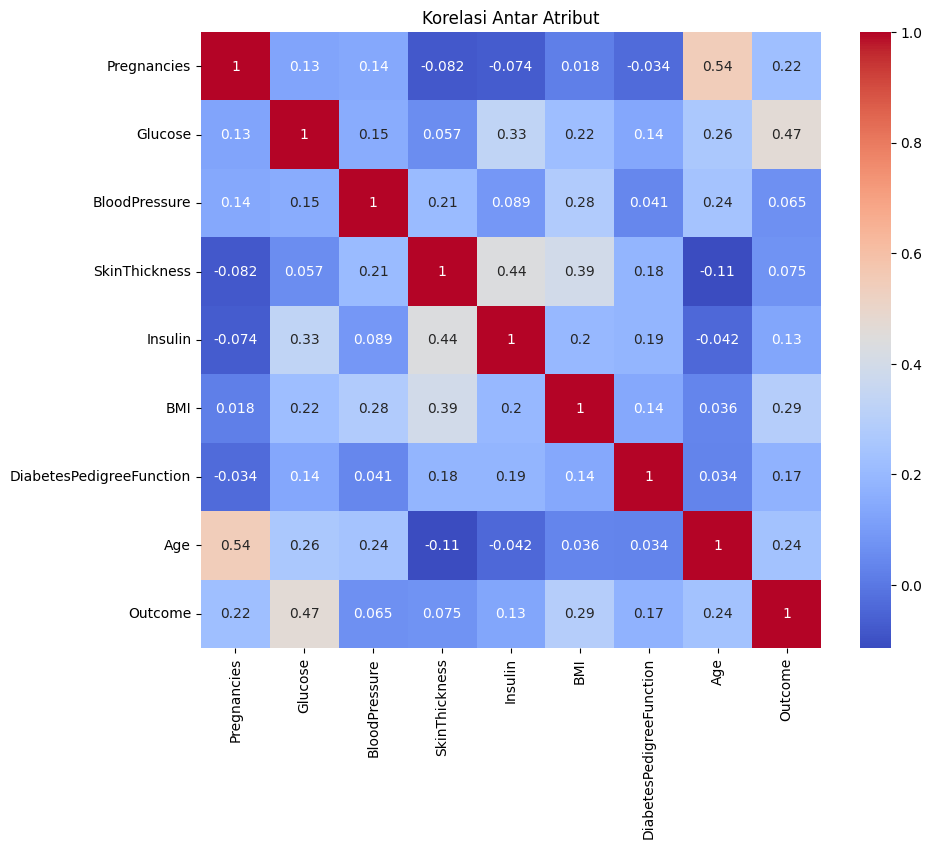

In [6]:
#HeatMap untuk mengetahui korelasi antar atribut
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Atribut')
plt.show()

In [7]:
# Menghapus atribut 'SkinThickness', 'BloodPressure', dan 'Insulin'
df = df.drop(['SkinThickness', 'BloodPressure', 'Insulin'], axis=1)

In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.duplicated().sum()

0

In [10]:
# Mendapatkan daftar atribut numerik kecuali 'Outcome'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

# Membuat subplots dengan jumlah kolom sesuai jumlah atribut numerik
fig = make_subplots(
    rows=1, cols=len(numeric_columns),  # Semua boxplot dalam satu baris
    subplot_titles=[f"Boxplot of {col}" for col in numeric_columns]  # Judul setiap subplot
)

# Menambahkan boxplot untuk setiap atribut
for i, col in enumerate(numeric_columns):
    fig.add_trace(go.Box(
        y=df[col],
        name=col,
        boxmean=True,  # Menampilkan nilai rata-rata
        jitter=0.3,  # Menambahkan pencampuran untuk titik data
        marker=dict(color='blue'),  # Warna boxplot
        boxpoints='all',  # Menampilkan semua titik data
        pointpos=0  # Menentukan posisi titik data
    ), row=1, col=i+1)  # Menyesuaikan posisi kolom subplot

# Memperbarui tata letak untuk semua boxplot
fig.update_layout(
    title="Boxplot of Numerical Attributes (Excluding Outcome)",
    title_font=dict(size=18, weight='bold'),  # Judul tebal
    height=500,  # Tinggi grafik
    width=300 * len(numeric_columns),  # Lebar grafik berdasarkan jumlah atribut
    showlegend=False,  # Tidak menampilkan legend
    title_x=0.5  # Menempatkan judul di tengah
)

# Menyesuaikan skala sumbu Y untuk masing-masing boxplot
for i, col in enumerate(numeric_columns):
    fig.update_yaxes(title_text=col, row=1, col=i+1, autorange=True, showgrid=True)

# Menampilkan grafik
fig.show()

In [11]:
# Loop melalui setiap kolom (kecuali 'Outcome')
for column in df.columns:
    if column != 'Outcome':
        # Menghitung Q1, Q3, dan IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas atas dan bawah
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        # Mengganti outlier dengan nilai batas
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

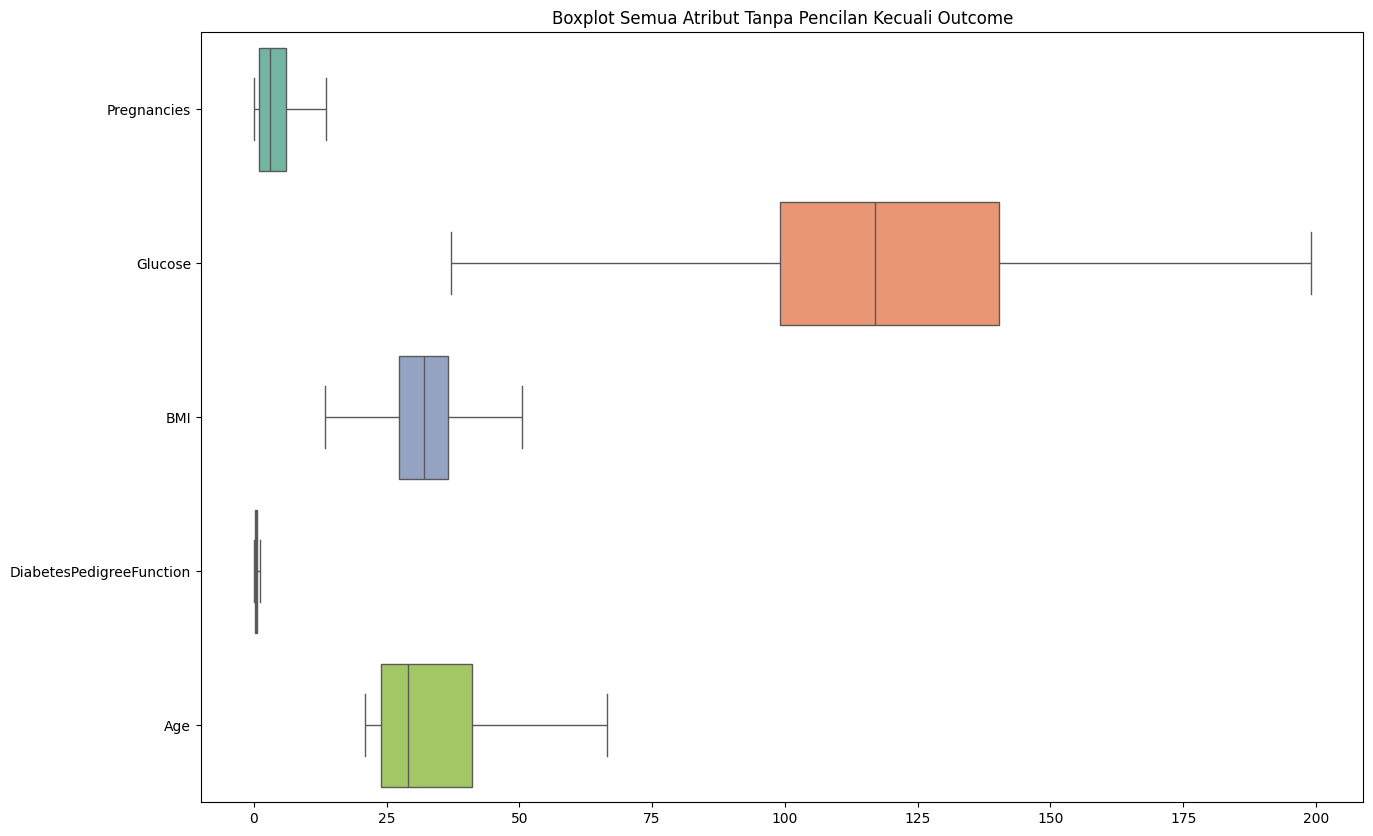

In [12]:
plt.figure(figsize=(15, 10))  # Mengatur ukuran figur
sns.boxplot(data=df.drop(columns=['Outcome']), orient="h", palette="Set2")  # Membuat boxplot tanpa kolom Outcome
plt.title("Boxplot Semua Atribut Tanpa Pencilan Kecuali Outcome")  # Menambahkan judul
plt.show()  # Menampilkan plot

In [13]:
#Normalisasi data menggunakan Z Score
features_to_normalize = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
print(df.head())

   Pregnancies   Glucose       BMI  DiabetesPedigreeFunction       Age  \
0     0.647150  0.861926  0.209359                  0.588927  1.445691   
1    -0.848970 -1.159433 -0.784254                 -0.378101 -0.189304   
2     1.245598  1.984903 -1.252672                  0.746595 -0.103252   
3    -0.848970 -1.031093 -0.571337                 -1.022787 -1.049828   
4    -1.148194  0.508990  1.557835                  2.596563 -0.017199   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1  


In [14]:
# Membagi dataset menjadi data training dan data testing dengan rasio 80:20
X = df.drop('Outcome', axis=1)  # Fitur
y = df['Outcome']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan data testing
print("Ukuran data training:", X_train.shape, y_train.shape)
print("Ukuran data testing:", X_test.shape, y_test.shape)

Ukuran data training: (614, 5) (614,)
Ukuran data testing: (154, 5) (154,)


#### <b>Metode dan Eksperimen</b>
<b>PENJELASAN METODE</b><br>
Metode yang digunakan dalam model ini adalah K-Nearest Neighbors (KNN), sebuah algoritma yang termasuk dalam kategori supervised learning. KNN digunakan untuk klasifikasi data, di mana tujuan utamanya adalah memprediksi kelas label untuk data uji (x_test) berdasarkan mayoritas label dari k tetangga terdekat dalam data latih (X_train). Pada dasarnya, algoritma KNN menghitung jarak antara data uji dengan semua titik dalam data latih dan memilih k titik terdekat untuk menentukan prediksi berdasarkan kelas mayoritas di antara tetangga tersebut. Dalam model ini, dua metrik jarak yang digunakan untuk menghitung kedekatan antara titik data adalah Jarak Euclidean dan Jarak Manhattan. Jarak Euclidean dihitung sebagai akar kuadrat dari jumlah kuadrat selisih antara komponen-komponen vektor, sementara Jarak Manhattan mengukur total perbedaan antara dua titik dengan menghitung perbedaan absolut di sepanjang sumbu data. KNN dapat bekerja dengan baik dalam masalah klasifikasi yang sederhana dan efektif, tetapi kinerjanya sangat dipengaruhi oleh pemilihan nilai k dan metrik jarak yang digunakan.

<b>PENGUKURAN KINERJA YANG DIGUNAKAN (MATRIK EVALUASI)</b><br>
Untuk mengukur kinerja model, kode ini menggunakan beberapa metrik evaluasi yang umum digunakan dalam klasifikasi, yaitu **Akurasi, Precision, Recall, dan F1-Score**. Akurasi dihitung sebagai persentase prediksi yang benar dibandingkan dengan total prediksi yang dilakukan, memberikan gambaran umum mengenai seberapa baik model dalam memprediksi data. Precision mengukur proporsi prediksi positif yang benar-benar positif, yakni seberapa banyak dari semua prediksi yang diberi label positif yang sebenarnya memang positif. Recall, di sisi lain, mengukur proporsi data yang sebenarnya positif yang berhasil dideteksi oleh model, menggambarkan kemampuan model dalam menangkap semua kasus positif. F1-Score adalah metrik yang menggabungkan precision dan recall dalam satu angka, dengan memberikan keseimbangan antara keduanya, terutama ketika ada ketidakseimbangan kelas. F1-Score dihitung dengan rumus harmonik rata-rata antara precision dan recall, yang memberikan nilai lebih jika kedua metrik tersebut seimbang. Dengan mengukur berbagai aspek kinerja model menggunakan metrik ini, kita dapat mengevaluasi model lebih holistik dan memilih parameter yang menghasilkan performa terbaik.

<b>SETTING PARAMETER YANG DIGUNAKAN</b><br>
Dalam model ini, ada dua parameter utama yang disetting dan diuji untuk mencari konfigurasi terbaik, yaitu nilai k (jumlah tetangga terdekat) dan metrik jarak yang digunakan. Nilai k adalah jumlah tetangga yang diambil untuk menentukan label kelas prediksi pada data uji. Nilai k yang lebih kecil akan membuat model lebih sensitif terhadap data pelatihan, yang berisiko menyebabkan overfitting, sementara nilai k yang lebih besar akan memberikan model yang lebih stabil tetapi bisa kehilangan kemampuan untuk menangkap pola-pola lokal yang signifikan. Oleh karena itu, dalam kode ini, diuji beberapa nilai k yang berbeda, yaitu: [1, 3, 5, 7, 9]. Sedangkan untuk metrik jarak, dua pilihan yang diuji adalah Jarak Euclidean dan Jarak Manhattan. Jarak Euclidean adalah metrik yang paling sering digunakan dalam KNN, karena dianggap intuitif dan cocok untuk data dalam ruang multidimensi. Jarak Manhattan, di sisi lain, lebih berguna ketika perbedaan dalam dimensi tidak saling terhubung secara linier dan lebih cocok untuk data dengan nilai yang sangat bervariasi dalam setiap dimensi. Kedua setting ini diuji untuk setiap kombinasi, dan hasil evaluasi dikumpulkan untuk memilih kombinasi parameter yang menghasilkan kinerja terbaik.

Nilai k terbaik: 9
Metrik jarak terbaik: manhattan

Evaluasi pada data training:
Akurasi: 0.7997
Precision: 0.7394
Recall: 0.6526
F1-Score: 0.6933

Evaluasi pada data testing:
Akurasi: 0.7857
Precision: 0.7391
Recall: 0.6182
F1-Score: 0.6733


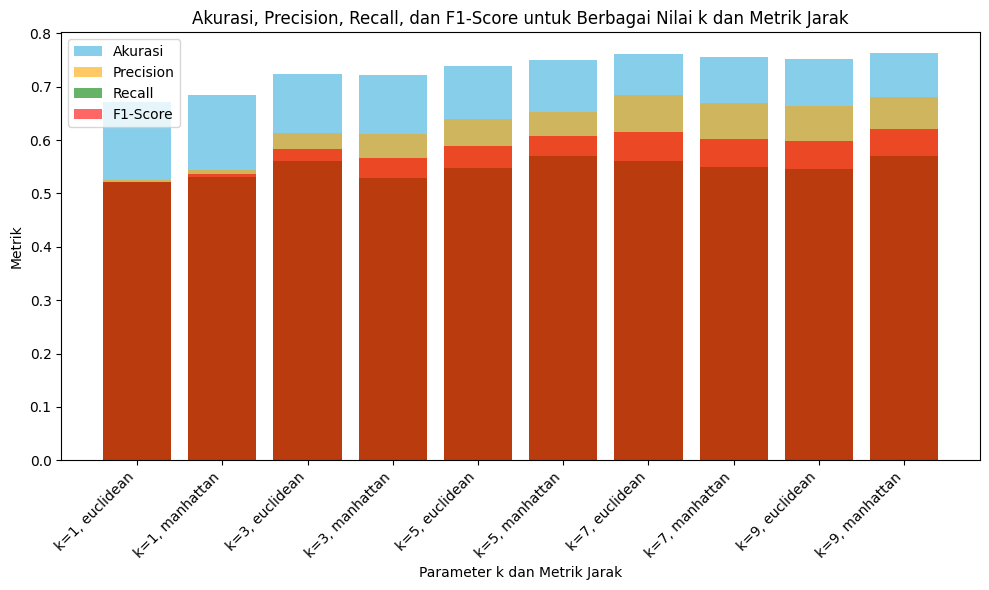

In [15]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Fungsi untuk menghitung jarak Manhattan
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Fungsi untuk melakukan prediksi dengan algoritma KNN
def predict(X_train, y_train, x_test, k, distance_metric):
    if distance_metric == 'euclidean':
        distances = [euclidean_distance(x_test, X_train.iloc[i]) for i in range(len(X_train))]
    elif distance_metric == 'manhattan':
        distances = [manhattan_distance(x_test, X_train.iloc[i]) for i in range(len(X_train))]
    else:
        raise ValueError("Metrik jarak tidak valid. Pilih 'euclidean' atau 'manhattan'.")

    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_nearest_indices]
    # Prediksi berdasarkan kelas mayoritas
    prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
    return prediction

# Fungsi untuk menghitung precision, recall, dan F1-score
def calculate_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

# Fungsi cross-validation untuk memilih k terbaik tanpa menggunakan KFold
def cross_validation_k(X_train, y_train, k_values, distance_metrics, num_folds=5):
    best_k = None
    best_distance_metric = None
    best_accuracy = 0
    best_precision = 0
    best_recall = 0
    best_f1_score = 0
    results = []  # Untuk menyimpan semua akurasi rata-rata

    # Membagi data menjadi beberapa fold secara manual
    fold_size = len(X_train) // num_folds
    for k in k_values:
        for distance_metric in distance_metrics:
            accuracies = []
            precisions = []
            recalls = []
            f1_scores = []

            # Melakukan cross-validation
            for fold in range(num_folds):
                val_start = fold * fold_size
                val_end = (fold + 1) * fold_size if fold != num_folds - 1 else len(X_train)

                # Membagi data menjadi training dan validation set
                X_train_fold = pd.concat([X_train.iloc[:val_start], X_train.iloc[val_end:]])
                y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]])
                X_val_fold = X_train.iloc[val_start:val_end]
                y_val_fold = y_train.iloc[val_start:val_end]

                val_predictions = [predict(X_train_fold, y_train_fold, X_val_fold.iloc[i], k, distance_metric) for i in range(len(X_val_fold))]
                val_predictions = np.array(val_predictions)

                # Menghitung akurasi
                accuracy = np.sum(val_predictions == y_val_fold) / len(y_val_fold)
                accuracies.append(accuracy)

                # Menghitung precision, recall, dan F1-score
                precision, recall, f1_score = calculate_metrics(y_val_fold, val_predictions)
                precisions.append(precision)
                recalls.append(recall)
                f1_scores.append(f1_score)

            # Menghitung rata-rata metrik
            mean_accuracy = np.mean(accuracies)
            mean_precision = np.mean(precisions)
            mean_recall = np.mean(recalls)
            mean_f1_score = np.mean(f1_scores)
            results.append((k, distance_metric, mean_accuracy, mean_precision, mean_recall, mean_f1_score))

            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_precision = mean_precision
                best_recall = mean_recall
                best_f1_score = mean_f1_score
                best_k = k
                best_distance_metric = distance_metric

    return best_k, best_distance_metric, best_accuracy, best_precision, best_recall, best_f1_score, results

# Tentukan nilai k dan metrik jarak yang ingin diuji
k_values = [1, 3, 5, 7, 9]
distance_metrics = ['euclidean', 'manhattan']

# Cari nilai k terbaik dengan cross-validation
best_k, best_distance_metric, best_accuracy, best_precision, best_recall, best_f1_score, results = cross_validation_k(X_train, y_train, k_values, distance_metrics)

# Evaluasi pada data training
train_predictions = [predict(X_train, y_train, X_train.iloc[i], best_k, best_distance_metric) for i in range(len(X_train))]
train_predictions = np.array(train_predictions)
train_accuracy = np.sum(train_predictions == y_train) / len(y_train)
train_precision, train_recall, train_f1_score = calculate_metrics(y_train, train_predictions)

# Evaluasi pada data testing
test_predictions = [predict(X_train, y_train, X_test.iloc[i], best_k, best_distance_metric) for i in range(len(X_test))]
test_predictions = np.array(test_predictions)
test_accuracy = np.sum(test_predictions == y_test) / len(y_test)
test_precision, test_recall, test_f1_score = calculate_metrics(y_test, test_predictions)

print(f"Nilai k terbaik: {best_k}")
print(f"Metrik jarak terbaik: {best_distance_metric}")
print(f"\nEvaluasi pada data training:")
print(f"Akurasi: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")

print(f"\nEvaluasi pada data testing:")
print(f"Akurasi: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")

# Visualisasi hasil dalam bentuk histogram
k_values_with_metrics = [f'k={k}, {metric}' for k, metric, _, _, _, _ in results]
accuracies = [accuracy for _, _, accuracy, _, _, _ in results]
precisions = [precision for _, _, _, precision, _, _ in results]
recalls = [recall for _, _, _, _, recall, _ in results]
f1_scores = [f1_score for _, _, _, _, _, f1_score in results]

plt.figure(figsize=(10, 6))
plt.bar(k_values_with_metrics, accuracies, color='skyblue', label='Akurasi')
plt.bar(k_values_with_metrics, precisions, color='orange', label='Precision', alpha=0.6)
plt.bar(k_values_with_metrics, recalls, color='green', label='Recall', alpha=0.6)
plt.bar(k_values_with_metrics, f1_scores, color='red', label='F1-Score', alpha=0.6)
plt.xlabel('Parameter k dan Metrik Jarak')
plt.ylabel('Metrik')
plt.title('Akurasi, Precision, Recall, dan F1-Score untuk Berbagai Nilai k dan Metrik Jarak')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#### <b>Hasil dan Analisis</b>

<b>EVALUASI PERFORMA PADA DATA TRAINING</b><br>
Akurasi (79.97%): Model mampu mengklasifikasikan hampir 80% data training dengan benar.<br>

Precision (73.94%): Dari seluruh prediksi positif model, sekitar 74% adalah benar-benar positif.<br>

Dalam hal ini, artinya odel memiliki tingkat keandalan yang baik dalam mengidentifikasi kelas positif.<br>

Recall (65.26%): Model dapat mengidentifikasi sekitar 65% dari total sampel positif di data training.<br>

Dengan begitu model masih dapat ditingkatkan untuk menangkap lebih banyak sampel positif yang benar.<br>

F1-Score (69.33%): Kombinasi precision dan recall menunjukkan keseimbangan kinerja yang baik.

<b>EVALUASI PERFORMA PADA DATA TESTING</b><br>
Akurasi (78.57%): Model mampu mempertahankan akurasi yang cukup stabil di data testing, hanya turun sekitar 1,4% dari data training. Hal ini menunjukkan bahwa model memiliki generalisasi yang baik.<br>

Precision (73.91%): Sama seperti data training, model tetap konsisten dalam memastikan prediksi positifnya dapat diandalkan.<br>

Recall (61.82%): Model berhasil menangkap sekitar 62% dari total sampel positif. Penurunan recall dibandingkan data training menunjukkan bahwa model sedikit kesulitan mengenali semua sampel positif pada data baru.<br>

F1-Score (67.33%): Meskipun ada sedikit penurunan, F1-Score tetap menunjukkan keseimbangan kinerja yang baik pada data testing.

<b>ANALISIS PERBANDINGAN DATA TRAINING DAN TESTING</b><br>
Akurasi Stabil: Performa akurasi pada data training dan testing cukup konsisten, menunjukkan bahwa model tidak mengalami overfitting atau underfitting.<br>

Precision Stabil: Precision pada data testing hampir identik dengan data training, menandakan bahwa model mampu mempertahankan keandalannya dalam mengenali prediksi positif.<br>

Recall Menurun: Penurunan recall dari 65.26% ke 61.82% menunjukkan bahwa model sedikit kesulitan menangkap semua kasus positif pada data baru.<br>

F1-Score Menurun: Penurunan dari 69.33% ke 67.33% menunjukkan adanya penurunan keseimbangan antara precision dan recall pada data testing.

#### <b>Kesimpulan</b>

Model KNN dengan k=9 dan metrik manhattan memiliki performa yang baik dengan generalisasi yang cukup stabil antara data training dan testing. Selain itu, model mampu memberikan prediksi positif yang dapat diandalkan yang disebabkan oleh precision yang tinggi. Kemudian, akurasi cukup stabil, baik pada data training maupun testing. Akan tetapi model masih dapat ditingkatkan untuk menangkap lebih banyak sampel positif karena nilai recall yang cukup rendah.
